In [34]:
import pandas as pd
import numpy as np

In [35]:
datalink = "./TDC2.0 Dataset/TDC2.0 Dataset/SensorGW-5/"


In [71]:
df=pd.read_csv(datalink+'2022-09/PCU-4-P-CF-2022-09-30.csv',sep="\t",header=None)
df

,0,1,2,3,4,5
0,2022-09-30 00:00:00,396,238.60,1.65,100,507.7
1,2022-09-30 00:00:30,394,238.97,1.67,100,507.8
2,2022-09-30 00:01:01,399,238.97,1.65,100,507.8
3,2022-09-30 00:01:31,394,239.03,1.65,100,507.8
4,2022-09-30 00:02:01,394,238.76,1.64,100,507.8
...,...,...,...,...,...,...
2875,2022-09-30 23:57:30,395,239.63,1.65,100,518.0
2876,2022-09-30 23:58:00,396,240.05,1.64,100,518.0
2877,2022-09-30 23:58:30,401,239.98,1.65,100,518.0
2878,2022-09-30 23:59:00,398,239.94,1.65,100,518.0


In [70]:
df=pd.read_csv(datalink+'2022-09/PCU-4-P-CF-2022-09-30.csv',sep="\t",header=None)

def data_sorting(df):
    df.columns = ['Timestamp', 'Value1', 'Value2', 'Value3', 'Value4', 'Value5']
    # Convert the Timestamp column to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set the Timestamp column as the index
    df.set_index('Timestamp', inplace=True)
    # Resample the df into quarters and calculate the mean for each quarter
    quarterly_df = df.resample('1H').mean()
    quarterly_df.drop(columns=df.columns[1:],inplace=True)
    quarterly_df.index = pd.to_datetime(quarterly_df.index)
    return quarterly_df

# Assigning column names
df.columns = ['Timestamp', 'Value1', 'Value2', 'Value3', 'Value4', 'Value5']

# Convert the Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Resample the df into quarters and calculate the mean for each quarter
quarterly_df = df.resample('1H').mean()
quarterly_df.drop(columns=df.columns[1:],inplace=True)
quarterly_df.index = pd.to_datetime(quarterly_df.index)



# Display the processed quarterly df
quarterly_df.index


DatetimeIndex(['2022-09-30 00:00:00', '2022-09-30 01:00:00',
               '2022-09-30 02:00:00', '2022-09-30 03:00:00',
               '2022-09-30 04:00:00', '2022-09-30 05:00:00',
               '2022-09-30 06:00:00', '2022-09-30 07:00:00',
               '2022-09-30 08:00:00', '2022-09-30 09:00:00',
               '2022-09-30 10:00:00', '2022-09-30 11:00:00',
               '2022-09-30 12:00:00', '2022-09-30 13:00:00',
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', freq='H')

In [72]:
import pandas as pd

# Assuming csv_files_data is your list of DataFrames
# Example: csv_files_data = [merged_data1, merged_data2, merged_data3, ...]

# Step 1: Concatenate all DataFrames, allowing duplicate indices

def merge(csv_files_data):
    merged_data = pd.concat(csv_files_data)

    # Step 2: Group by the index and sum the values for duplicate indices
    merged_data = merged_data.groupby(merged_data.index).sum()

    # Step 3: Sort the DataFrame by its index
    merged_data = merged_data.sort_index()

    # Display the final merged DataFrame
    #merged_data.head(20)

    # merged_data['date'] = merged_data.index.day
    # merged_data['hour'] = merged_data.index.hour

    # Sort by date and then by hour
    #merged_data_sorted = merged_data.sort_values(by=['hour', 'date'])

    # Drop the 'hour' and 'date' columns and reset index
    #merged_data_sorted = merged_data_sorted.drop(columns=['hour', 'date'])#.reset_index(drop=True)
    #merged_data_sorted
    return merged_data
    # (Optional) Save the result to a CSV file
    #merged_data.to_csv('merged_data.csv')


In [ ]:
import os
import pandas as pd

months = ["2022-09","2022-10","2022-11","2022-12","2023-01","2023-02"]
# 폴더 경로 설정
csv_data=[]
for i in range(len(months)):
    folder_path = "./TDC2.0 Dataset/TDC2.0 Dataset/SensorGW-5/"+months[i]  # 여기에 폴더 경로를 입력하세요.

    # 모든 CSV 파일을 저장할 리스트
    csv_files_data = []
    error = []
    # 폴더 안의 모든 파일을 확인
    for file_name in os.listdir(folder_path):
        # CSV 파일만 선택
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            
            # CSV 파일 읽기
            try:
                data = pd.read_csv(file_path,sep="\t",header=None)
                data=data_sorting(data)
                csv_files_data.append(data)  # 데이터를 리스트에 추가
                #print(f"Loaded: {file_name}")
            except Exception as e:
                error.append(file_name)
                print(f"Error loading {file_name}: {e}")

    # 하나의 DataFrame으로 병합 (옵션)
    # merged_data = pd.concat(csv_files_data, ignore_index=True)

    # 결과 확인
    print(f"\n{months[i]} Total CSV files loaded: {len(csv_files_data)}")
    csv_data.append(merge(csv_files_data))
new_merged_data = merge(csv_data)


2022-09 Total CSV files loaded: 300

2022-10 Total CSV files loaded: 339

2022-11 Total CSV files loaded: 330

2022-12 Total CSV files loaded: 341

2023-01 Total CSV files loaded: 341

2023-02 Total CSV files loaded: 308


In [74]:
new_merged_data["Value1"]=new_merged_data["Value1"]*(1/1000)
new_merged_data["Value1"]=new_merged_data["Value1"].round(5)

#new_merged_data.columns=["Energy(kWh)"]
new_merged_data

,Value1
Timestamp,
2022-09-01 00:00:00,14.36350
2022-09-01 01:00:00,14.39562
2022-09-01 02:00:00,14.35788
2022-09-01 03:00:00,14.12362
2022-09-01 04:00:00,14.08128
...,...
2023-02-28 19:00:00,11.35395
2023-02-28 20:00:00,11.31758
2023-02-28 21:00:00,11.19537


In [75]:
new_merged_data.columns=["Energy(kWh)"]
new_merged_data.to_csv("cooling_energy_consumption_new.csv")

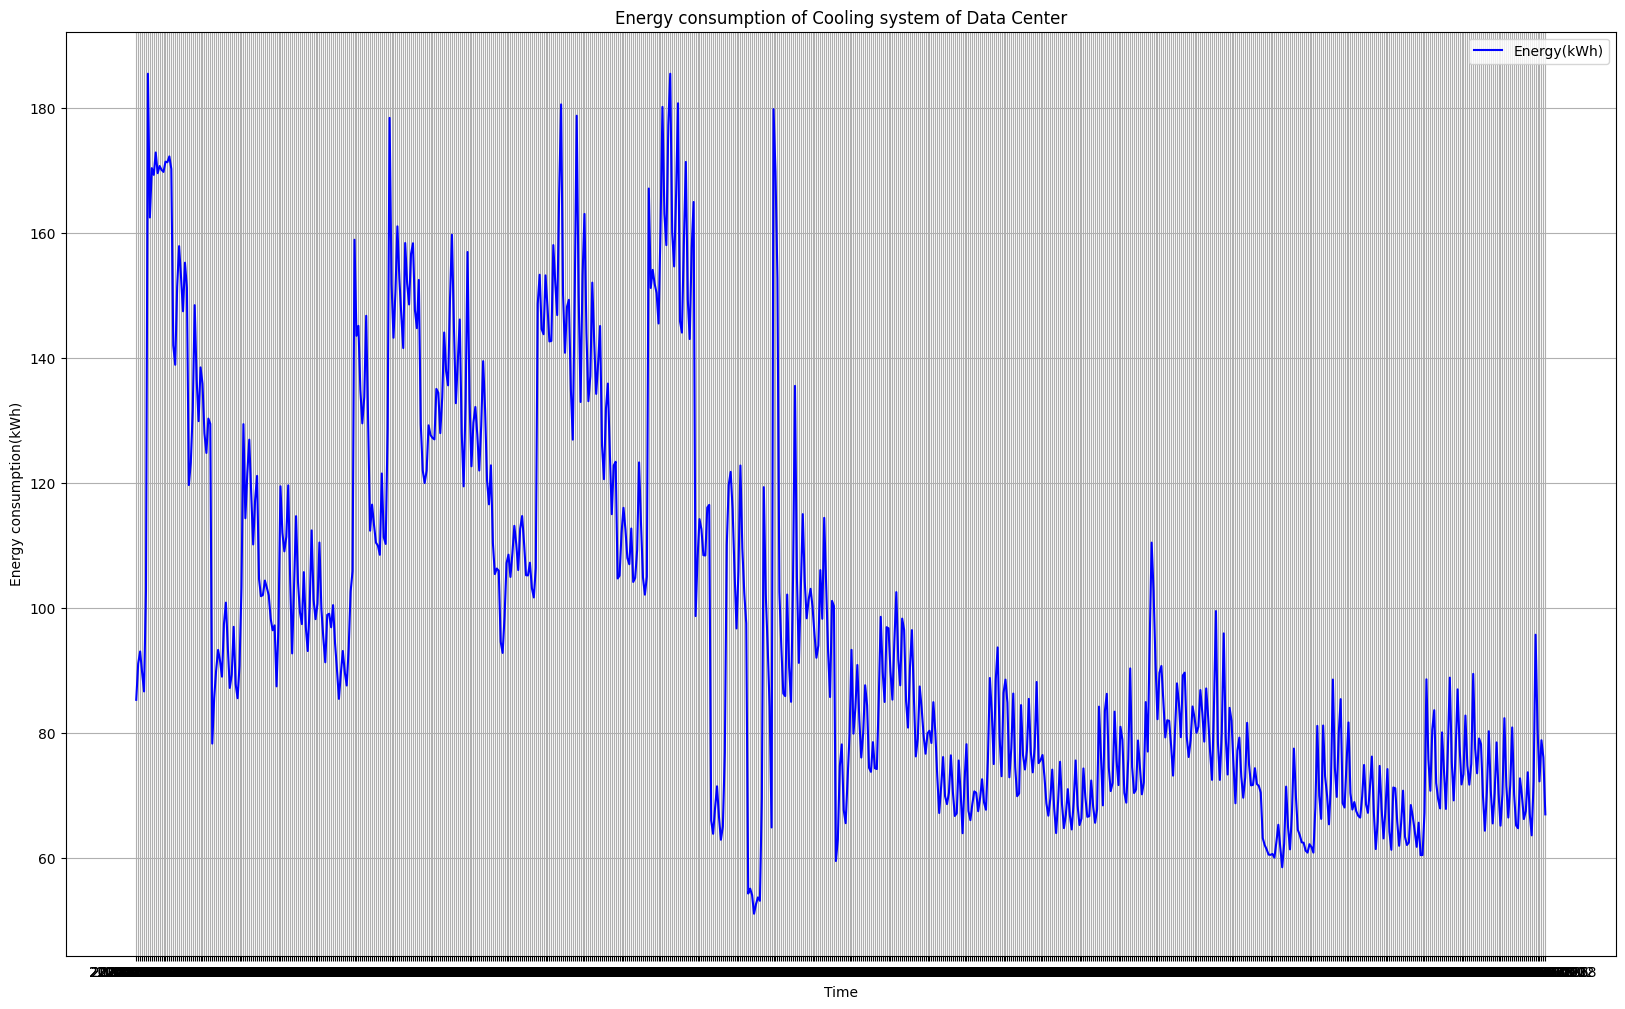

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into pandas DataFrame (assuming the file is named 'data.csv')
df = pd.read_csv('cooling_energy_consumption.csv')

# Ensure that the timestamp column is of datetime type (assuming 'timestamp' is the name of the column)

# Plot the data
plt.figure(figsize=(20, 12))
plt.plot(df['Timestamp'], df['Energy(kWh)'], label='Energy(kWh)', color='blue')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Energy consumption(kWh)')
plt.title('Energy consumption of Cooling system of Data Center')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import requests

url = "https://api.data.gov.sg/v1/environment/wind-speed"

response = requests.get(url)

print(response.json())

{'metadata': {'stations': [{'id': 'S117', 'device_id': 'S117', 'name': 'Banyan Road', 'location': {'latitude': 1.256, 'longitude': 103.679}}, {'id': 'S50', 'device_id': 'S50', 'name': 'Clementi Road', 'location': {'latitude': 1.3337, 'longitude': 103.7768}}, {'id': 'S44', 'device_id': 'S44', 'name': 'Nanyang Avenue', 'location': {'latitude': 1.34583, 'longitude': 103.68166}}, {'id': 'S121', 'device_id': 'S121', 'name': 'Old Choa Chu Kang Road', 'location': {'latitude': 1.37288, 'longitude': 103.72244}}, {'id': 'S106', 'device_id': 'S106', 'name': 'Pulau Ubin', 'location': {'latitude': 1.4168, 'longitude': 103.9673}}, {'id': 'S111', 'device_id': 'S111', 'name': 'Scotts Road', 'location': {'latitude': 1.31055, 'longitude': 103.8365}}, {'id': 'S60', 'device_id': 'S60', 'name': 'Sentosa', 'location': {'latitude': 1.25, 'longitude': 103.8279}}, {'id': 'S115', 'device_id': 'S115', 'name': 'Tuas South Avenue 3', 'location': {'latitude': 1.29377, 'longitude': 103.61843}}, {'id': 'S116', 'devic

In [6]:
import requests

# API endpoint
url = "https://api.data.gov.sg/v1/environment/wind-speed"

# Parameters for the specific date
params = {
    "date_time": "2022-09-30T01:00:00"  # Date in YYYY-MM-DD format
}

# Making the GET request
response = requests.get(url, params=params)

# Printing the response JSON
if response.status_code == 200:
    print(response.json())
else:
    print(f"Error: {response.status_code}, {response.text}")

{'metadata': {'stations': [{'id': 'S109', 'device_id': 'S109', 'name': 'Ang Mo Kio Avenue 5', 'location': {'latitude': 1.3764, 'longitude': 103.8492}}, {'id': 'S117', 'device_id': 'S117', 'name': 'Banyan Road', 'location': {'latitude': 1.256, 'longitude': 103.679}}, {'id': 'S50', 'device_id': 'S50', 'name': 'Clementi Road', 'location': {'latitude': 1.3337, 'longitude': 103.7768}}, {'id': 'S107', 'device_id': 'S107', 'name': 'East Coast Parkway', 'location': {'latitude': 1.3135, 'longitude': 103.9625}}, {'id': 'S43', 'device_id': 'S43', 'name': 'Kim Chuan Road', 'location': {'latitude': 1.3399, 'longitude': 103.8878}}, {'id': 'S108', 'device_id': 'S108', 'name': 'Marina Gardens Drive', 'location': {'latitude': 1.2799, 'longitude': 103.8703}}, {'id': 'S44', 'device_id': 'S44', 'name': 'Nanyang Avenue', 'location': {'latitude': 1.34583, 'longitude': 103.68166}}, {'id': 'S121', 'device_id': 'S121', 'name': 'Old Choa Chu Kang Road', 'location': {'latitude': 1.37288, 'longitude': 103.72244}}

In [7]:
from math import radians, sin, cos, sqrt, atan2

# Kallang's coordinates
kallang_coords = {"latitude": 1.307, "longitude": 103.871}

# List of station coordinates
stations = [
    {"station_id": "S109", "name": "Ang Mo Kio Avenue 5", "latitude": 1.3764, "longitude": 103.8492},
    {"station_id": "S117", "name": "Banyan Road", "latitude": 1.256, "longitude": 103.679},
    {"station_id": "S50", "name": "Clementi Road", "latitude": 1.3337, "longitude": 103.7768},
    {"station_id": "S107", "name": "East Coast Parkway", "latitude": 1.3135, "longitude": 103.9625},
    {"station_id": "S43", "name": "Kim Chuan Road", "latitude": 1.3399, "longitude": 103.8878},
    {"station_id": "S108", "name": "Marina Gardens Drive", "latitude": 1.2799, "longitude": 103.8703},
    {"station_id": "S44", "name": "Nanyang Avenue", "latitude": 1.34583, "longitude": 103.68166},
    {"station_id": "S121", "name": "Old Choa Chu Kang Road", "latitude": 1.37288, "longitude": 103.72244},
    {"station_id": "S106", "name": "Pulau Ubin", "latitude": 1.4168, "longitude": 103.9673},
    {"station_id": "S111", "name": "Scotts Road", "latitude": 1.31055, "longitude": 103.8365},
    {"station_id": "S60", "name": "Sentosa", "latitude": 1.25, "longitude": 103.8279},
    {"station_id": "S115", "name": "Tuas South Avenue 3", "latitude": 1.29377, "longitude": 103.61843},
    {"station_id": "S24", "name": "Upper Changi Road North", "latitude": 1.3678, "longitude": 103.9826},
    {"station_id": "S116", "name": "West Coast Highway", "latitude": 1.281, "longitude": 103.754},
    {"station_id": "S104", "name": "Woodlands Avenue 9", "latitude": 1.44387, "longitude": 103.78538},
    {"station_id": "S100", "name": "Woodlands Road", "latitude": 1.4172, "longitude": 103.74855}
]

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Radius of Earth in kilometers
    r = 6371
    return r * c

# Find the closest station
closest_station = min(
    stations,
    key=lambda station: haversine(
        kallang_coords["latitude"], kallang_coords["longitude"],
        station["latitude"], station["longitude"]
    )
)

print(f"Closest station: {closest_station['name']} (Station ID: {closest_station['station_id']})")


Closest station: Marina Gardens Drive (Station ID: S108)


In [ ]:
import requests

# API endpoint
url = "https://api.data.gov.sg/v1/environment/wind-speed"

# Parameters for the specific date and time
params = {
    "date_time": "2022-09-30T01:00:00"  # Specify the datetime in ISO format
}

# Making the GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the response JSON
    # Extract readings
    items = data.get("items", [])
    for item in items:
        readings = item.get("readings", [])
        # Find the reading for station S108
        for reading in readings:
            if reading["station_id"] == "S108":
                print(f"Wind speed value for S108: {reading['value']} knots")
else:
    print(f"Error: {response.status_code}, {response.text}")


[{'station_id': 'S109', 'value': 0.8}, {'station_id': 'S117', 'value': 3.3}, {'station_id': 'S50', 'value': 1}, {'station_id': 'S107', 'value': 1.5}, {'station_id': 'S43', 'value': 0.5}, {'station_id': 'S108', 'value': 1}, {'station_id': 'S44', 'value': 0.7}, {'station_id': 'S121', 'value': 5.5}, {'station_id': 'S106', 'value': 1.2}, {'station_id': 'S111', 'value': 3.6}, {'station_id': 'S60', 'value': 1}, {'station_id': 'S115', 'value': 2.1}, {'station_id': 'S24', 'value': 1.6}, {'station_id': 'S116', 'value': 2.8}, {'station_id': 'S104', 'value': 0.6}, {'station_id': 'S100', 'value': 1.2}]


In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# API endpoint
url = "https://api.data.gov.sg/v1/environment/wind-speed"

time = [(2022,9,30),(2022,10,31),(2022,11,30),(2022,12,31),(2023,1,31),(2023,2,28)]
time = [(2022,10,1)]
for t in time:
# Start and end dates
    start_date = datetime(t[0], t[1], 1)
    end_date = datetime(t[0], t[1], t[2], 23)  # Include all hours on the last day

    # Initialize current date
    current_date = start_date

    # Storage for results
    s108_readings = []

    # Loop through every hour in September 2022
    while current_date <= end_date:
        # Format the date_time as ISO 8601
        date_time = current_date.strftime("%Y-%m-%dT%H:00:00")
        params = {"date_time": date_time}
        
        # Request data from the API
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            # Extract readings
            items = data.get("items", [])
            for item in items:
                readings = item.get("readings", [])
                for reading in readings:
                    # Check for S108
                    if reading["station_id"] == "S108":
                        # Save the timestamp and wind speed value
                        s108_readings.append({
                            "timestamp": pd.to_datetime(item["timestamp"]),
                            "value": reading["value"]
                        })
        else:
            print(f"Error fetching data for {date_time}: {response.status_code}")
        
        # Increment by 1 hour
        current_date += timedelta(hours=1)

    # Convert the results into a pandas DataFrame
    df = pd.DataFrame(s108_readings)

    # Convert timestamp to pandas datetime for easier handling
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Display the first few rows of the DataFrame
    #print(df.head())

    # Save to CSV for future use
    df.to_csv(f"Wind_speed_Raw_{t[0]}_{t[1]}.csv", index=False)
    df.set_index('timestamp', inplace=True)
    new_df=df.resample('6H').mean()
    new_df.index = pd.to_datetime(new_df.index)
    new_df.to_csv(f"Wind_speed_6H_{t[0]}_{t[1]}.csv", index=False)



In [133]:
a=["1","2"]
a.remove("1")
a

['2']

In [ ]:
### Air temperature at diffenent region
import requests
import pandas as pd
from datetime import datetime, timedelta

a=["S77", "S109", "S64", "S90", "S61", "S114", "S50", "S107", "S215", "S118", 
 "S120", "S33", "S71", "S43", "S66", "S112", "S40", "S108", "S113", "S44", 
 "S119", "S121", "S35", "S94", "S78", "S106", "S81", "S201", "S202", "S203", 
 "S204", "S205", "S207", "S208", "S209", "S210", "S211", "S212", "S213", 
 "S214", "S216", "S217", "S218", "S219", "S220", "S221", "S222", "S223", 
 "S224", "S226", "S227", "S228", "S229", "S230", "S111", "S900", "S60", 
 "S84", "S79", "S88", "S123", "S89", "S115", "S82", "S24", "S69", "S36", 
 "S08", "S116", "S104", "S100"]
b=["S77", "S109", "S64", "S90", "S61", "S114", "S50", "S107", "S215", "S118", 
 "S120", "S33", "S71", "S43", "S66", "S112", "S40", "S108", "S113", "S44", 
 "S119", "S121", "S35", "S94", "S78", "S106", "S81", "S201", "S202", "S203", 
 "S204", "S205", "S207", "S208", "S209", "S210", "S211", "S212", "S213", 
 "S214", "S216", "S217", "S218", "S219", "S220", "S221", "S222", "S223", 
 "S224", "S226", "S227", "S228", "S229", "S230", "S111", "S900", "S60", 
 "S84", "S79", "S88", "S123", "S89", "S115", "S82", "S24", "S69", "S36", 
 "S08", "S116", "S104", "S100"]



def get_data(data_:str,place:str):
# API endpoint
    url = "https://api.data.gov.sg/v1/environment/"+data_

    time = [(2022,12,31),(2023,1,31),(2023,2,28)]#(2022,9,30),(2022,10,31),(2022,11,30),
    time = [(2023,3,31)]
    for t in time:
    # Start and end dates
        start_date = datetime(t[0], t[1], 1)
        end_date = datetime(t[0], t[1], t[2], 23)  # Include all hours on the last day

        # Initialize current date
        current_date = start_date

        # Storage for results
        s108_readings = []

        # Loop through every hour in September 2022
        while current_date <= end_date:
            # Format the date_time as ISO 8601
            date_time = current_date.strftime("%Y-%m-%dT%H:00:00")
            params = {"date_time": date_time}
            
            # Request data from the API
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                # Extract readings
                items = data.get("items", [])
                #print(items)
                for item in items:
                    readings = item.get("readings", [])
                    for reading in readings:
                        # Check for S108
                        if reading["station_id"] == place:
                            # Save the timestamp and wind speed value
                            s108_readings.append({
                                "timestamp": pd.to_datetime(item["timestamp"]),
                                "value": reading["value"]
                            })
            else:
                print(f"Error fetching data for {date_time}: {response.status_code}")
                a.pop(place)
            
            # Increment by 1 hour
            current_date += timedelta(hours=1)

        # Convert the results into a pandas DataFrame
        try:
            df = pd.DataFrame(s108_readings)
            #print("#####",df.head())
            #print(place,data_)
            # Convert timestamp to pandas datetime for easier handling
            df['timestamp'] = pd.to_datetime(df['timestamp'])

            # Display the first few rows of the DataFrame
            #print(df.head())

            # Save to CSV for future use
            #df.to_csv(f+"Air_temperature_{place}_{t[0]}_{t[1]}.csv", index=False)
            df.set_index('timestamp', inplace=True)
            new_df=df.resample('1H').mean()
            new_df.index = pd.to_datetime(new_df.index)
            #print(new_df)
            new_df.to_csv("./"+place+"_"+data_+"_"+str(t[0])+str(t[1])+".csv", index=False)
        except:
            print(f"Error at {place} on {data_} data at {current_date}")
            # try:
            #     b.remove(place)
            # except:
            #     pass

##Lim Chu Kang Road: S112 , Pulau Ubin: S106 -- 데이터센터에서 떨어진 두 공간
for place in ['S109']:
    for data in ['air-temperature']:
        get_data(data,place)

#print(b)
#get_data('wind-speed','S109')  'rainfall',
#rainfall, relative-humidity, air-temperature,wind-speed

[{'timestamp': '2022-10-01T00:00:00+08:00', 'readings': [{'station_id': 'S77', 'value': 0}, {'station_id': 'S109', 'value': 0}, {'station_id': 'S64', 'value': 0}, {'station_id': 'S90', 'value': 0}, {'station_id': 'S61', 'value': 0}, {'station_id': 'S114', 'value': 0}, {'station_id': 'S50', 'value': 0}, {'station_id': 'S107', 'value': 0}, {'station_id': 'S215', 'value': 0}, {'station_id': 'S118', 'value': 0}, {'station_id': 'S120', 'value': 0}, {'station_id': 'S33', 'value': 0}, {'station_id': 'S71', 'value': 0}, {'station_id': 'S43', 'value': 0}, {'station_id': 'S66', 'value': 0}, {'station_id': 'S112', 'value': 0}, {'station_id': 'S40', 'value': 0}, {'station_id': 'S108', 'value': 0}, {'station_id': 'S113', 'value': 0}, {'station_id': 'S44', 'value': 0}, {'station_id': 'S119', 'value': 0}, {'station_id': 'S121', 'value': 0}, {'station_id': 'S35', 'value': 0}, {'station_id': 'S94', 'value': 0}, {'station_id': 'S78', 'value': 0}, {'station_id': 'S106', 'value': 0}, {'station_id': 'S81', 'value': 0}, {'station_id': 'S201', 'value': 0}, {'station_id': 'S202', 'value': 0}, {'station_id': 'S203', 'value': 0}, {'station_id': 'S204', 'value': 0}, {'station_id': 'S205', 'value': 0}, {'station_id': 'S207', 'value': 0}, {'station_id': 'S208', 'value': 0}, {'station_id': 'S209', 'value': 0}, {'station_id': 'S210', 'value': 0}, {'station_id': 'S211', 'value': 0}, {'station_id': 'S212', 'value': 0}, {'station_id': 'S213', 'value': 0}, {'station_id': 'S214', 'value': 0}, {'station_id': 'S216', 'value': 0}, {'station_id': 'S217', 'value': 0}, {'station_id': 'S218', 'value': 0}, {'station_id': 'S219', 'value': 0}, {'station_id': 'S220', 'value': 0}, {'station_id': 'S221', 'value': 0}, {'station_id': 'S222', 'value': 0}, {'station_id': 'S223', 'value': 0}, {'station_id': 'S224', 'value': 0}, {'station_id': 'S226', 'value': 0}, {'station_id': 'S227', 'value': 0}, {'station_id': 'S228', 'value': 0}, {'station_id': 'S229', 'value': 0}, {'station_id': 'S230', 'value': 0}, {'station_id': 'S111', 'value': 0}, {'station_id': 'S900', 'value': 0}, {'station_id': 'S60', 'value': 0}, {'station_id': 'S84', 'value': 0}, {'station_id': 'S79', 'value': 0}, {'station_id': 'S88', 'value': 0}, {'station_id': 'S123', 'value': 0}, {'station_id': 'S89', 'value': 0}, {'station_id': 'S115', 'value': 0}, {'station_id': 'S82', 'value': 0}, {'station_id': 'S24', 'value': 0}, {'station_id': 'S69', 'value': 0}, {'station_id': 'S36', 'value': 0}, {'station_id': 'S08', 'value': 0}, {'station_id': 'S116', 'value': 0}, {'station_id': 'S104', 'value': 0}, {'station_id': 'S100', 'value': 0}]}]
[{'timestamp': '2022-10-01T01:00:00+08:00', 'readings': [{'station_id': 'S77', 'value': 0}, {'station_id': 'S109', 'value': 0}, {'station_id': 'S64', 'value': 0}, {'station_id': 'S90', 'value': 0}, {'station_id': 'S61', 'value': 0}, {'station_id': 'S114', 'value': 0}, {'station_id': 'S50', 'value': 0}, {'station_id': 'S107', 'value': 0}, {'station_id': 'S215', 'value': 0}, {'station_id': 'S118', 'value': 0}, {'station_id': 'S120', 'value': 0}, {'station_id': 'S33', 'value': 0}, {'station_id': 'S71', 'value': 0}, {'station_id': 'S43', 'value': 0}, {'station_id': 'S66', 'value': 0}, {'station_id': 'S112', 'value': 0}, {'station_id': 'S40', 'value': 0}, {'station_id': 'S108', 'value': 0}, {'station_id': 'S113', 'value': 0}, {'station_id': 'S44', 'value': 0}, {'station_id': 'S119', 'value': 0}, {'station_id': 'S121', 'value': 0}, {'station_id': 'S35', 'value': 0}, {'station_id': 'S94', 'value': 0}, {'station_id': 'S78', 'value': 0}, {'station_id': 'S106', 'value': 0}, {'station_id': 'S81', 'value': 0}, {'station_id': 'S201', 'value': 0}, {'station_id': 'S202', 'value': 0}, {'station_id': 'S203', 'value': 0}, {'station_id': 'S204', 'value': 0}, {'station_id': 'S205', 'value': 0}, {'station_id': 'S207', 'value': 0}, {'station_id': 'S208', 'value': 0}, {'station_id': 'S209', 'value': 0}, {'station_id': 'S210', 'value': 0}, {'station_id': 'S211', 'value': 0}, {'station_id': 'S212', 'value': 0}, {'station_id': 'S213', 'value': 0}, {'station_id': 'S214', 'value': 0}, {'station_id': 'S216', 'value': 0}, {'station_id': 'S217', 'value': 0}, {'station_id': 'S218', 'value': 0}, {'station_id': 'S219', 'value': 0}, {'station_id': 'S220', 'value': 0}, {'station_id': 'S221', 'value': 0}, {'station_id': 'S222', 'value': 0}, {'station_id': 'S223', 'value': 0}, {'station_id': 'S224', 'value': 0}, {'station_id': 'S226', 'value': 0}, {'station_id': 'S227', 'value': 0}, {'station_id': 'S228', 'value': 0}, {'station_id': 'S229', 'value': 0}, {'station_id': 'S230', 'value': 0}, {'station_id': 'S111', 'value': 0}, {'station_id': 'S900', 'value': 0}, {'station_id': 'S60', 'value': 0}, {'station_id': 'S84', 'value': 0}, {'station_id': 'S79', 'value': 0}, {'station_id': 'S88', 'value': 0}, {'station_id': 'S123', 'value': 0}, {'station_id': 'S89', 'value': 0}, {'station_id': 'S115', 'value': 0}, {'station_id': 'S82', 'value': 0}, {'station_id': 'S24', 'value': 0}, {'station_id': 'S69', 'value': 0}, {'station_id': 'S36', 'value': 0}, {'station_id': 'S08', 'value': 0}, {'station_id': 'S116', 'value': 0}, {'station_id': 'S104', 'value': 0}, {'station_id': 'S100', 'value': 0}]}]
[{'timestamp': '2022-10-01T02:00:00+08:00', 'readings': [{'station_id': 'S77', 'value': 0}, {'station_id': 'S109', 'value': 0}, {'station_id': 'S64', 'value': 0}, {'station_id': 'S90', 'value': 0}, {'station_id': 'S61', 'value': 0}, {'station_id': 'S114', 'value': 0}, {'station_id': 'S50', 'value': 0}, {'station_id': 'S107', 'value': 0}, {'station_id': 'S215', 'value': 0}, {'station_id': 'S118', 'value': 0}, {'station_id': 'S120', 'value': 0}, {'station_id': 'S33', 'value': 0}, {'station_id': 'S71', 'value': 0}, {'station_id': 'S43', 'value': 0}, {'station_id': 'S66', 'value': 0}, {'station_id': 'S112', 'value': 0}, {'station_id': 'S40', 'value': 0}, {'station_id': 'S108', 'value': 0}, {'station_id': 'S113', 'value': 0}, {'station_id': 'S44', 'value': 0}, {'station_id': 'S119', 'value': 0}, {'station_id': 'S121', 'value': 0}, {'station_id': 'S35', 'value': 0}, {'station_id': 'S94', 'value': 0}, {'station_id': 'S78', 'value': 0}, {'station_id': 'S106', 'value': 0}, {'station_id': 'S81', 'value': 0}, {'station_id': 'S201', 'value': 0}, {'station_id': 'S202', 'value': 0}, {'station_id': 'S203', 'value': 0}, {'station_id': 'S204', 'value': 0}, {'station_id': 'S205', 'value': 0}, {'station_id': 'S207', 'value': 0}, {'station_id': 'S208', 'value': 0}, {'station_id': 'S209', 'value': 0}, {'station_id': 'S210', 'value': 0}, {'station_id': 'S211', 'value': 0}, {'station_id': 'S212', 'value': 0}, {'station_id': 'S213', 'value': 0}, {'station_id': 'S214', 'value': 0}, {'station_id': 'S216', 'value': 0}, {'station_id': 'S217', 'value': 0}, {'station_id': 'S218', 'value': 0}, {'station_id': 'S219', 'value': 0}, {'station_id': 'S220', 'value': 0}, {'station_id': 'S221', 'value': 0}, {'station_id': 'S222', 'value': 0}, {'station_id': 'S223', 'value': 0}, {'station_id': 'S224', 'value': 0}, {'station_id': 'S226', 'value': 0}, {'station_id': 'S227', 'value': 0}, {'station_id': 'S228', 'value': 0}, {'station_id': 'S229', 'value': 0}, {'station_id': 'S230', 'value': 0}, {'station_id': 'S111', 'value': 0}, {'station_id': 'S900', 'value': 0}, {'station_id': 'S60', 'value': 0}, {'station_id': 'S84', 'value': 0}, {'station_id': 'S79', 'value': 0}, {'station_id': 'S88', 'value': 0}, {'station_id': 'S123', 'value': 0}, {'station_id': 'S89', 'value': 0}, {'station_id': 'S115', 'value': 0}, {'station_id': 'S82', 'value': 0}, {'station_id': 'S24', 'value': 0}, {'station_id': 'S69', 'value': 0}, {'station_id': 'S36', 'value': 0}, {'station_id': 'S08', 'value': 0}, {'station_id': 'S116', 'value': 0}, {'station_id': 'S104', 'value': 0}, {'station_id': 'S100', 'value': 0}]}]
Error at S115 on rainfall data at 2022-10-01 03:00:00
[{'timestamp': '2022-10-01T00:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 73.7}, {'station_id': 'S50', 'value': 81.2}, {'station_id': 'S107', 'value': 79.5}, {'station_id': 'S43', 'value': 75.9}, {'station_id': 'S108', 'value': 90}, {'station_id': 'S44', 'value': 81.1}, {'station_id': 'S121', 'value': 88.1}, {'station_id': 'S106', 'value': 94.4}, {'station_id': 'S111', 'value': 78.1}, {'station_id': 'S60', 'value': 77.1}, {'station_id': 'S115', 'value': 77.6}, {'station_id': 'S24', 'value': 80.6}, {'station_id': 'S116', 'value': 86.7}, {'station_id': 'S104', 'value': 80.4}, {'station_id': 'S100', 'value': 83.5}]}]
[{'timestamp': '2022-10-01T01:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 76.5}, {'station_id': 'S50', 'value': 84.8}, {'station_id': 'S107', 'value': 81}, {'station_id': 'S43', 'value': 79.3}, {'station_id': 'S108', 'value': 93.2}, {'station_id': 'S44', 'value': 85.3}, {'station_id': 'S121', 'value': 90.5}, {'station_id': 'S106', 'value': 95.5}, {'station_id': 'S111', 'value': 79.3}, {'station_id': 'S60', 'value': 79.4}, {'station_id': 'S115', 'value': 80.3}, {'station_id': 'S24', 'value': 81.2}, {'station_id': 'S116', 'value': 87.2}, {'station_id': 'S104', 'value': 84.4}, {'station_id': 'S100', 'value': 85.7}]}]
[{'timestamp': '2022-10-01T02:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 85.5}, {'station_id': 'S50', 'value': 82.6}, {'station_id': 'S107', 'value': 83.2}, {'station_id': 'S43', 'value': 81.7}, {'station_id': 'S108', 'value': 97.8}, {'station_id': 'S44', 'value': 90.8}, {'station_id': 'S121', 'value': 91.9}, {'station_id': 'S106', 'value': 94.8}, {'station_id': 'S111', 'value': 80.8}, {'station_id': 'S60', 'value': 81.7}, {'station_id': 'S115', 'value': 85.7}, {'station_id': 'S24', 'value': 85}, {'station_id': 'S116', 'value': 89.2}, {'station_id': 'S104', 'value': 87.9}, {'station_id': 'S100', 'value': 89.8}]}]
Error at S115 on relative-humidity data at 2022-10-01 03:00:00
[{'timestamp': '2022-10-01T00:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 28.4}, {'station_id': 'S50', 'value': 27.7}, {'station_id': 'S107', 'value': 28.9}, {'station_id': 'S43', 'value': 28.6}, {'station_id': 'S108', 'value': 28.6}, {'station_id': 'S44', 'value': 27.8}, {'station_id': 'S121', 'value': 27.2}, {'station_id': 'S106', 'value': 26.1}, {'station_id': 'S111', 'value': 28}, {'station_id': 'S60', 'value': 28.1}, {'station_id': 'S115', 'value': 28.8}, {'station_id': 'S24', 'value': 28.2}, {'station_id': 'S116', 'value': 29}, {'station_id': 'S104', 'value': 28.2}, {'station_id': 'S100', 'value': 27.5}]}]
[{'timestamp': '2022-10-01T01:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 28}, {'station_id': 'S50', 'value': 27.2}, {'station_id': 'S107', 'value': 28.9}, {'station_id': 'S43', 'value': 28.2}, {'station_id': 'S108', 'value': 28.3}, {'station_id': 'S44', 'value': 26.9}, {'station_id': 'S121', 'value': 26.8}, {'station_id': 'S106', 'value': 26.3}, {'station_id': 'S111', 'value': 27.8}, {'station_id': 'S60', 'value': 27.9}, {'station_id': 'S115', 'value': 28.6}, {'station_id': 'S24', 'value': 27.9}, {'station_id': 'S116', 'value': 28.8}, {'station_id': 'S104', 'value': 27.5}, {'station_id': 'S100', 'value': 27.5}]}]
[{'timestamp': '2022-10-01T02:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 27.4}, {'station_id': 'S50', 'value': 27.2}, {'station_id': 'S107', 'value': 28.4}, {'station_id': 'S43', 'value': 28.1}, {'station_id': 'S108', 'value': 28}, {'station_id': 'S44', 'value': 26.1}, {'station_id': 'S121', 'value': 26.5}, {'station_id': 'S106', 'value': 26.3}, {'station_id': 'S111', 'value': 27.6}, {'station_id': 'S60', 'value': 27.8}, {'station_id': 'S115', 'value': 27.1}, {'station_id': 'S24', 'value': 27.6}, {'station_id': 'S116', 'value': 28.5}, {'station_id': 'S104', 'value': 26.9}, {'station_id': 'S100', 'value': 27.2}]}]
Error at S115 on air-temperature data at 2022-10-01 03:00:00
[{'timestamp': '2022-10-01T00:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 2.1}, {'station_id': 'S117', 'value': 5.2}, {'station_id': 'S50', 'value': 0.5}, {'station_id': 'S107', 'value': 1.7}, {'station_id': 'S43', 'value': 2.6}, {'station_id': 'S108', 'value': 1.7}, {'station_id': 'S44', 'value': 2.1}, {'station_id': 'S121', 'value': 5.4}, {'station_id': 'S106', 'value': 0.9}, {'station_id': 'S111', 'value': 3.6}, {'station_id': 'S60', 'value': 2.5}, {'station_id': 'S115', 'value': 1.4}, {'station_id': 'S24', 'value': 3.6}, {'station_id': 'S116', 'value': 2.4}, {'station_id': 'S104', 'value': 2.9}, {'station_id': 'S100', 'value': 0.8}]}]
[{'timestamp': '2022-10-01T01:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 0.9}, {'station_id': 'S117', 'value': 3}, {'station_id': 'S50', 'value': 1}, {'station_id': 'S107', 'value': 1.7}, {'station_id': 'S43', 'value': 1}, {'station_id': 'S108', 'value': 0.9}, {'station_id': 'S44', 'value': 2.3}, {'station_id': 'S121', 'value': 5.4}, {'station_id': 'S106', 'value': 0.6}, {'station_id': 'S111', 'value': 2}, {'station_id': 'S60', 'value': 1.1}, {'station_id': 'S115', 'value': 1.9}, {'station_id': 'S24', 'value': 1.7}, {'station_id': 'S116', 'value': 2}, {'station_id': 'S104', 'value': 2.3}, {'station_id': 'S100', 'value': 1}]}]
[{'timestamp': '2022-10-01T02:00:00+08:00', 'readings': [{'station_id': 'S109', 'value': 2.2}, {'station_id': 'S117', 'value': 2}, {'station_id': 'S50', 'value': 1.7}, {'station_id': 'S107', 'value': 2}, {'station_id': 'S43', 'value': 2.9}, {'station_id': 'S108', 'value': 1.1}, {'station_id': 'S44', 'value': 2.2}, {'station_id': 'S121', 'value': 5.2}, {'station_id': 'S106', 'value': 1.1}, {'station_id': 'S111', 'value': 2}, {'station_id': 'S60', 'value': 1.9}, {'station_id': 'S115', 'value': 3.4}, {'station_id': 'S24', 'value': 2.7}, {'station_id': 'S116', 'value': 1.8}, {'station_id': 'S104', 'value': 4.6}, {'station_id': 'S100', 'value': 1.6}]}]
Error at S115 on wind-speed data at 2022-10-01 03:00:00


In [ ]:
### Relative humidity
import requests
import pandas as pd
from datetime import datetime, timedelta

# API endpoint
url = "https://api.data.gov.sg/v1/environment/relative-humidity"

time = [(2022,9,30),(2022,10,31),(2022,11,30),(2022,12,31),(2023,1,31),(2023,2,28)]
for t in time:
# Start and end dates
    start_date = datetime(t[0], t[1], 1)
    end_date = datetime(t[0], t[1], t[2], 23)  # Include all hours on the last day

    # Initialize current date
    current_date = start_date

    # Storage for results
    s108_readings = []

    # Loop through every hour in September 2022
    while current_date <= end_date:
        # Format the date_time as ISO 8601
        date_time = current_date.strftime("%Y-%m-%dT%H:00:00")
        params = {"date_time": date_time}
        
        # Request data from the API
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            # Extract readings
            items = data.get("items", [])
            for item in items:
                readings = item.get("readings", [])
                for reading in readings:
                    # Check for S108
                    if reading["station_id"] == "S109":
                        # Save the timestamp and wind speed value
                        s108_readings.append({
                            "timestamp": pd.to_datetime(item["timestamp"]),
                            "value": reading["value"]
                        })
        else:
            print(f"Error fetching data for {date_time}: {response.status_code}")
        
        # Increment by 1 hour
        current_date += timedelta(hours=1)

    # Convert the results into a pandas DataFrame
    df = pd.DataFrame(s108_readings)

    # Convert timestamp to pandas datetime for easier handling
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Display the first few rows of the DataFrame
    #print(df.head())

    # Save to CSV for future use
    df.to_csv(f"Wind_speed_Raw_{t[0]}_{t[1]}.csv", index=False)
    df.set_index('timestamp', inplace=True)
    new_df=df.resample('1H').mean()
    new_df.index = pd.to_datetime(new_df.index)
    new_df.to_csv(f"Wind_speed_1H_{t[0]}_{t[1]}.csv", index=False)



In [7]:
### test

import requests
import pandas as pd
from datetime import datetime, timedelta

# API endpoint
url = "https://api.data.gov.sg/v1/environment/wind-speed"

#time = [(2022,9,30),(2022,10,31),(2022,11,30),(2022,12,31),(2023,1,31),(2023,2,28)]
time = [(2022,10,31)]
for t in time:
# Start and end dates
    start_date = datetime(t[0], t[1],20, 1)
    end_date = datetime(t[0], t[1], t[2]-10, 23)  # Include all hours on the last day

    # Initialize current date
    current_date = start_date

    # Storage for results
    s108_readings = []

    # Loop through every hour in September 2022
    while current_date <= end_date:
        # Format the date_time as ISO 8601
        date_time = current_date.strftime("%Y-%m-%dT%H:00:00")
        params = {"date_time": date_time}
        
        # Request data from the API
        response = requests.get(url, params=params)
        #print(response)
        if response.status_code == 200:
            data = response.json()
            print(data)
            # Extract readings
            items = data.get("items", [])
            for item in items:
                readings = item.get("readings", [])
                for reading in readings:
                    # Check for S108
                    if reading["station_id"] == "S108":
                        #print(reading)
                        # Save the timestamp and wind speed value
                        s108_readings.append({
                            "timestamp": pd.to_datetime(item["timestamp"]),
                            "value": reading["value"]
                        })
                    else:
                        print(f"Error fetching data for {date_time}: {response.status_code}")
        else:
            print(f"Error fetching data for {date_time}: {response.status_code}")
        
        # Increment by 1 hour
        current_date += timedelta(hours=1)

    # Convert the results into a pandas DataFrame
    df = pd.DataFrame(s108_readings)

    # Convert timestamp to pandas datetime for easier handling
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Display the first few rows of the DataFrame
    #print(df.head())

    # Save to CSV for future use
    df.to_csv(f"Wind_speed_Raw_{t[0]}_{t[1]}.csv", index=False)
    df.set_index('timestamp', inplace=True)
    new_df=df.resample('6H').mean()
    new_df.index = pd.to_datetime(new_df.index)
    new_df.to_csv(f"Wind_speed_6H_{t[0]}_{t[1]}.csv", index=False)



<Response [200]>
{'metadata': {'stations': [{'id': 'S109', 'device_id': 'S109', 'name': 'Ang Mo Kio Avenue 5', 'location': {'latitude': 1.3764, 'longitude': 103.8492}}, {'id': 'S117', 'device_id': 'S117', 'name': 'Banyan Road', 'location': {'latitude': 1.256, 'longitude': 103.679}}, {'id': 'S50', 'device_id': 'S50', 'name': 'Clementi Road', 'location': {'latitude': 1.3337, 'longitude': 103.7768}}, {'id': 'S107', 'device_id': 'S107', 'name': 'East Coast Parkway', 'location': {'latitude': 1.3135, 'longitude': 103.9625}}, {'id': 'S43', 'device_id': 'S43', 'name': 'Kim Chuan Road', 'location': {'latitude': 1.3399, 'longitude': 103.8878}}, {'id': 'S108', 'device_id': 'S108', 'name': 'Marina Gardens Drive', 'location': {'latitude': 1.2799, 'longitude': 103.8703}}, {'id': 'S44', 'device_id': 'S44', 'name': 'Nanyang Avenue', 'location': {'latitude': 1.34583, 'longitude': 103.68166}}, {'id': 'S121', 'device_id': 'S121', 'name': 'Old Choa Chu Kang Road', 'location': {'latitude': 1.37288, 'longit

In [11]:
df['timestamp']
df.set_index('timestamp', inplace=True)
df.resample('6H').mean()

,value
timestamp,
2022-09-01 00:00:00+08:00,2.100000
2022-09-01 06:00:00+08:00,1.733333
2022-09-01 12:00:00+08:00,3.966667
2022-09-01 18:00:00+08:00,1.466667


In [ ]:
for t in [(2022,10),(2022,11),(2022,12),(2023,1),(2023,2)]:
    new_df=df.resample('6H').mean()
    new_df.index = pd.to_datetime(new_df.index)
    new_df.to_csv(f"Wind_speed_6H_{t[0]}_{t[1]}.csv", index=False)


Merge

In [29]:
import os
import pandas as pd
from functools import reduce
folder_path = "./wind_speed_raw"  # 여기에 폴더 경로를 입력하세요.

    # 모든 CSV 파일을 저장할 리스트
csv_files_data = []
error = []
# 폴더 안의 모든 파일을 확인
for file_name in os.listdir(folder_path):
    # CSV 파일만 선택
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # CSV 파일 읽기
        try:
            data = pd.read_csv(file_path)
            data.index = pd.to_datetime(data['timestamp'])
            
            new_df=data.resample('1H').mean()
            csv_files_data.append(new_df)  # 데이터를 리스트에 추가
            #print(f"Loaded: {file_name}")
        except Exception as e:
            error.append(file_name)
            print(f"Error loading {file_name}: {e}")

# 하나의 DataFrame으로 병합 (옵션)
merged_data = pd.concat(csv_files_data, ignore_index=True)

# 결과 확인
print(f"\n Total CSV files loaded: {len(csv_files_data)}")
#csv_data.append(merge(csv_files_data))
merged_data.to_csv('wind_speed_raw.csv')


 Total CSV files loaded: 6


In [ ]:
import os
import pandas as pd
from functools import reduce

# Folder containing the CSV files
folder_path = "./wind_speed"

# List to store data from each CSV file
csv_files_data = []
error = []

# Reference columns to ensure consistent merging
reference_columns = None

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Process only CSV files
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Read the CSV file
            data = pd.read_csv(file_path)
            
            # Initialize reference columns from the first file
            if reference_columns is None:
                reference_columns = data.columns
            
            # Ensure the current file matches the reference columns
            if not data.columns.equals(reference_columns):
                data = data.reindex(columns=reference_columns)
            
            # Add to the list
            csv_files_data.append(data)
        except Exception as e:
            # Log any errors encountered
            error.append(file_name)
            print(f"Error loading {file_name}: {e}")

# Merge all DataFrames into one
if csv_files_data:
    merged_data = pd.concat(csv_files_data, ignore_index=True)
else:
    merged_data = pd.DataFrame(columns=reference_columns)

# Save the merged DataFrame to a CSV file
output_file = "wind_speed_1.csv"
merged_data.to_csv(output_file, index=False)

# Print summary
print(f"\nTotal CSV files loaded: {len(csv_files_data)}")
print(f"Total errors encountered: {len(error)}")
if error:
    print(f"Files with errors: {error}")
print(f"Merged data saved to {output_file}")


os.listdir(folder_path)


Total CSV files loaded: 6
Total errors encountered: 0
Merged data saved to wind_speed_1.csv


['Wind_speed_6H_2022_09.csv',
 'Wind_speed_6H_2022_10.csv',
 'Wind_speed_6H_2022_11.csv',
 'Wind_speed_6H_2022_12.csv',
 'Wind_speed_6H_2023_1.csv',
 'Wind_speed_6H_2023_2.csv']

In [30]:
import os
import pandas as pd
folder_path = "./Raw_rainfall"  # 여기에 폴더 경로를 입력하세요.

    # 모든 CSV 파일을 저장할 리스트
csv_files_data = []
error = []
# 폴더 안의 모든 파일을 확인
for file_name in os.listdir(folder_path):
    # CSV 파일만 선택
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # CSV 파일 읽기
        try:
            data = pd.read_csv(file_path)
            data.index = pd.to_datetime(data['timestamp'])
            
            new_df=data.resample('1H').mean()
            csv_files_data.append(new_df)  # 데이터를 리스트에 추가
        except Exception as e:
            error.append(file_name)
            print(f"Error loading {file_name}: {e}")

# 하나의 DataFrame으로 병합 (옵션)
merged_data = pd.concat(csv_files_data, ignore_index=True)

# 결과 확인
print(f"\n Total CSV files loaded: {len(csv_files_data)}")
#csv_data.append(merge(csv_files_data))
merged_data.to_csv('rainfall_raw.csv')


 Total CSV files loaded: 6


In [8]:
merged_df = pd.concat([pd.read_csv('wind_speed_raw.csv'), pd.read_csv('rainfall_raw.csv')], axis=1)

merged_df.drop(columns=['Unnamed: 0','Unnamed: 0'],inplace=True)
merged_df.columns=['wind speed','rainfall']
merged_df.index=pd.read_csv('cooling_energy_consumption_new.csv')['Timestamp']
merged_df.head()
merged_df.to_csv('wind velocity & rainfall_raw.csv')

In [9]:
import os
folder_path = "./for_merge" 
x=[file_name for file_name in os.listdir(folder_path)]
#file_path = os.path.join(folder_path, file_name)
print(x)
merged_df = pd.concat([pd.read_csv(os.path.join(folder_path, file_name)) for file_name in x], axis=1)
merged_df.columns=['temperature','rainfall','humidity','wind speed']
merged_df.to_csv('S109_weather_data.csv')
merged_df.head()
# merged_df.drop(columns=['Unnamed: 0','Unnamed: 0'],inplace=True)
# merged_df.columns=['wind speed','rainfall']
# merged_df.index=pd.read_csv('cooling_energy_consumption_new.csv')['Timestamp']
# merged_df.head()
# merged_df.to_csv('wind velocity & rainfall_raw.csv')

['S109_air-temperature_202302.csv', 'S109_rainfall_202302.csv', 'S109_relative-humidity_202302.csv', 'S109_wind-speed_202302.csv']


,temperature,rainfall,humidity,wind speed
0,24.3,0.0,88.8,1.6
1,24.1,0.0,90.2,1.6
2,24.1,0.0,90.3,2.0
3,24.0,0.0,90.2,1.1
4,23.9,0.0,90.6,1.2


## KNN method

In [67]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset with missing values
dataset_path = 'final_dataset.csv'
df = pd.read_csv(dataset_path)

print("Original DataFrame with Missing Values:")
print(df.head())

# Create KNNImputer instance (k=3)
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data
imputed_data = imputer.fit_transform(df)

# Convert the result back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

print("\nDataFrame After KNN Imputation:")
print(imputed_df.head())


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\johnl\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\johnl\AppData\Local\Temp\ipykernel_28516\4147569647.py", line 3, in <cell line: 3>
    from sklearn.impute import KNNImputer
  File "c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\sklearn\__init__.py", line 82, in <module>
    from .base import clone
  File "c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\sklearn\base.py", line 17, in <module>
    from .utils import _IS_32BIT
  File "c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\sklearn\utils\__init__.py", line 25, in <module>
    from .fixes import parse_version, threadpool_info
  File "c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\sklearn\utils\fixes.py", line 19, in <module>
    import scipy.stats
  File "c:\Users\johnl\anaconda3\envs\my_pytho

In [65]:
!pip install --upgrade scipy


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e7/1c/8daa6df17a945cb1a2a1e3bae3c49643f7b3b94017ff01a4787064f03f84/scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata
     -------------------------------------- 60.8/60.8 kB 815.1 kB/s eta 0:00:00
   ---------------------------------------- 44.8/44.8 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\johnl\\anaconda3\\envs\\my_python_env\\Lib\\site-packages\\~cipy.libs\\libopenblas-802f9ed1179cb9c9b03d67ff79f48187.dll'
Consider using the `--user` option or check the permissions.

